In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from keras.callbacks import EarlyStopping
from matplotlib.colors import LogNorm
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.mixture import BayesianGaussianMixture
from tabulate import tabulate
import cv2 as cv
from google.colab.patches import cv2_imshow
from scipy.stats import pearsonr
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import os
from sklearn.preprocessing import MinMaxScaler
from matplotlib.ticker import FixedLocator, FixedFormatter
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding
from scipy.stats import ortho_group
from scipy.spatial import procrustes
from tensorflow.keras.models import Model
import os
import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = '/content/drive/MyDrive/AML/360 Rocks'

In [3]:
imgs = sorted(os.listdir(path))

In [4]:
matrix_with_human_data =np.loadtxt('/content/drive/MyDrive/AML/mds_360.txt')

In [5]:
st= time.time()
img=[]

for image in imgs:
  img.append(cv.imread(os.path.join(path, image), cv.IMREAD_GRAYSCALE))

print(time.time() - st)

9.986568927764893


In [6]:
# flatten the images
img_flat = []
for i in range(len(img)):
  img_flat.append(np.ravel(img[i]))
img_flat = np.array(img_flat)

In [7]:
# scaling
img_flat = img_flat / 255.0

# 1:

In [8]:
st= time.time()
pca = PCA(n_components=0.95)
pca_reduced = pca.fit_transform(img_flat)
print(f'The number of components required to preserve 95 percent variance is {pca.n_components_}')

print(time.time() - st)

The number of components required to preserve 95 percent variance is 227
118.01586389541626


# 1: Solution
The number of components required to preserve 95 percent variance is 227.


# 2:

In [9]:
pca_reduced.shape

(360, 227)

In [10]:
# reconstruction
pca_recovered = pca.inverse_transform(pca_reduced)

In [11]:
pca_recovered.shape

(360, 640000)

Since the image is flattened we have to reshape it back to 800,800 to plot them

In [12]:
# reshaping
pca_recovered = pca_recovered.reshape(pca_recovered.shape[0], 800, 800)

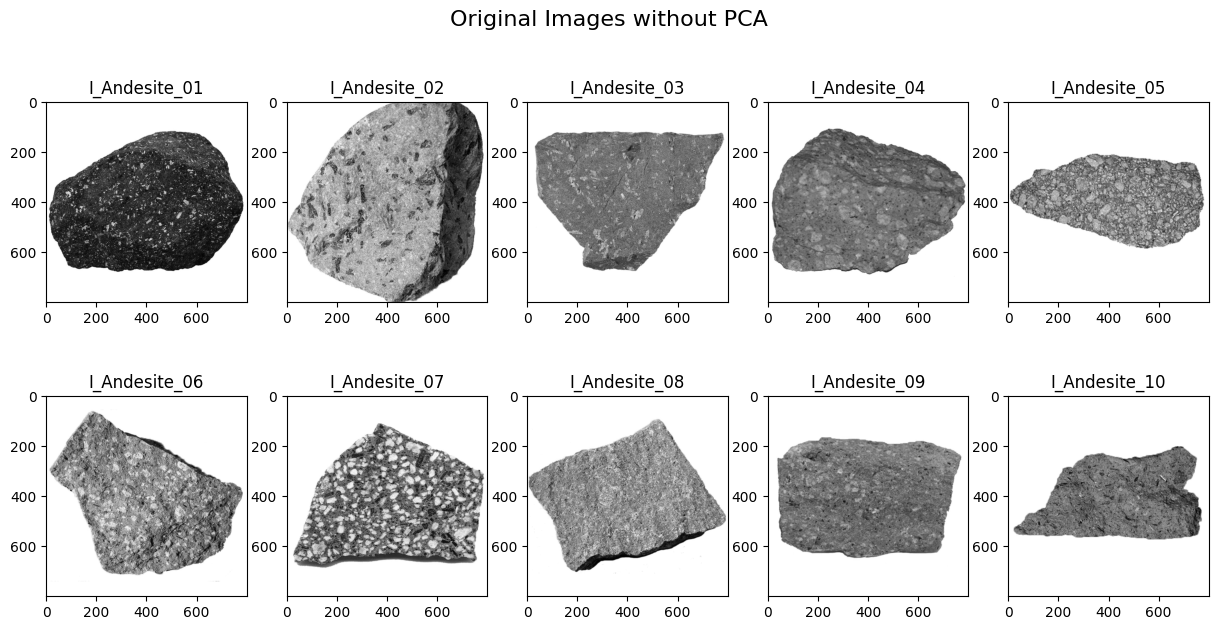

In [13]:
plt.figure(figsize=(15, 7))
plt.suptitle("Original Images without PCA", fontsize=16)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img[i], cmap='gray')
    if i < len(imgs):
        plt.title(imgs[i].removesuffix('.jpg'))

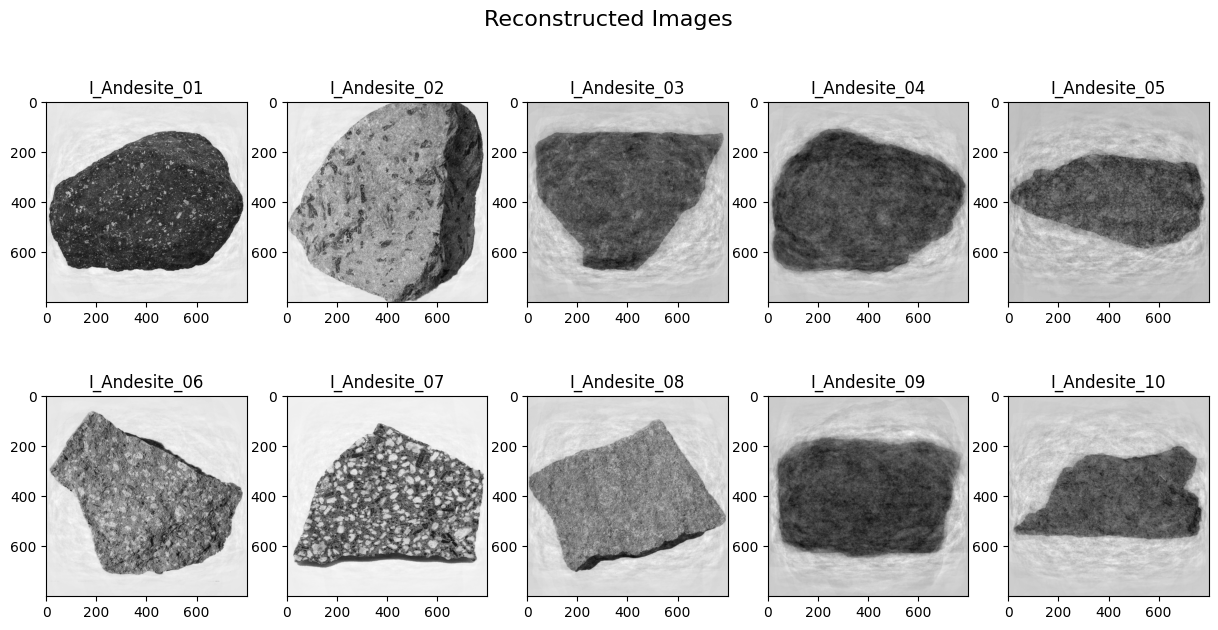

In [14]:
# reconstructed images after keeping 95 percent variance using PCA
plt.figure(figsize=(15, 7))
plt.suptitle("Reconstructed Images", fontsize=16)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(pca_recovered[i], cmap='gray')
    if i < len(imgs):
        plt.title(imgs[i].removesuffix('.jpg'))

# 3: A

In [15]:
pca_2 = PCA(n_components=2)
%time pca_reduced_2 = pca_2.fit_transform(img_flat)

CPU times: user 26 s, sys: 3.45 s, total: 29.4 s
Wall time: 18.8 s


In [16]:
print(f' The amount of variance explained by first two components is {sum(pca_2.explained_variance_ratio_) *100}%')

 The amount of variance explained by first two components is 33.17705577328241%


# 3A: Solution

 The amount of variance explained by first two components is 33.17705577328243%

# 3: B

In [17]:
# dividing into categories (I,M,S)
category= []
for k in imgs:
  if k.startswith('I'):
    category.append(0)
  elif k.startswith('M'):
    category.append(1)
  else:
    category.append(2)

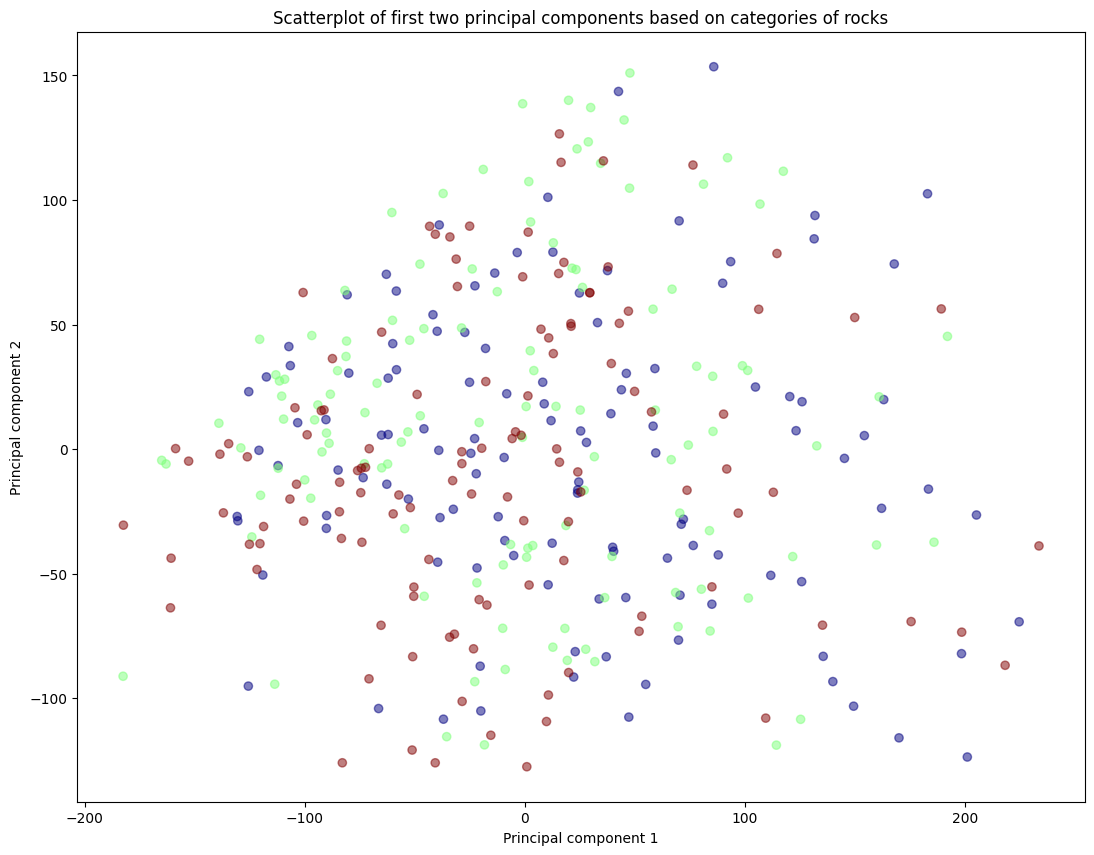

In [18]:
# scatterplot of first two principal components based on their categories
plt.figure(figsize=(13, 10))
plt.scatter(pca_reduced_2[:, 0], pca_reduced_2[:, 1],
           c=category,cmap="jet", alpha=0.5)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Scatterplot of first two principal components based on categories of rocks')
plt.show()

In [19]:
def plot_rocks(X, y, min_distance=0.04, images=None, figsize=(13, 10)):
    X_norm= MinMaxScaler().fit_transform(X)
    neighbors = np.array([[3., 3.]])

    plt.figure(figsize=figsize)
    cmap = plt.cm.jet
    categories = np.unique(y)
    plt.scatter(X_norm[:, 0], X_norm[:, 1],
           c=category,cmap="jet", alpha=0.5)

    ax = plt.gca()
    for idx, img_cord in enumerate(X_norm):
        closest_dist = np.linalg.norm(neighbors - img_cord, axis=1).min()
        if closest_dist > min_distance:
            neighbors = np.r_[neighbors, [img_cord]]
            if images is None:
                plt.text(img_cord[0], img_cord[1], str(int(y[idx])),
                         fontdict={"weight": "bold", "size": 16})
            else:
                image = images[idx].reshape(800, 800)
                imagebox = AnnotationBbox(OffsetImage(image,zoom = 0.015),
                                          img_cord)
                ax.add_artist(imagebox)

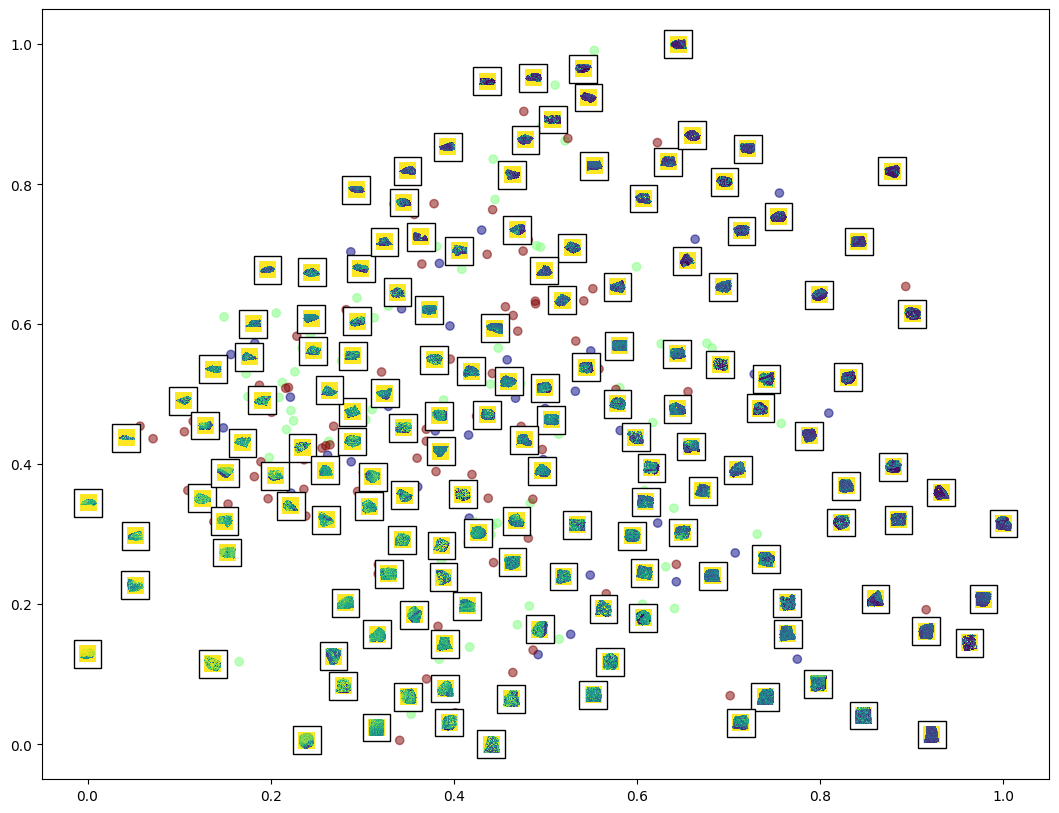

In [20]:
plot_rocks(X = pca_reduced_2,images = img, y = category)

# T-SNE

In [21]:
tsne_2 = TSNE(n_components=2, learning_rate="auto", random_state=42)
%time tsne_reduced_2 = tsne_2.fit_transform(img_flat)

CPU times: user 38.3 s, sys: 5.6 s, total: 43.9 s
Wall time: 38.9 s


In [22]:
tsne_reduced_2.shape

(360, 2)

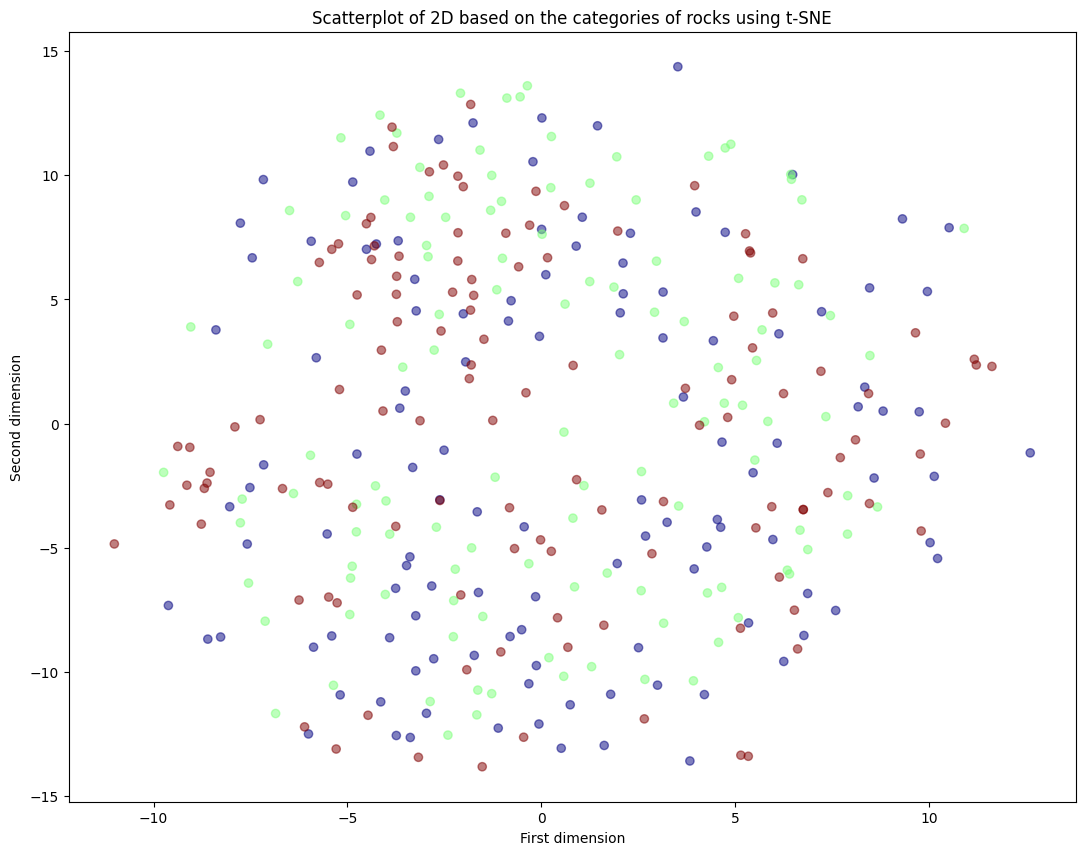

In [23]:
# Scatterplot of 2D based on the categories of rocks using t-SNE
plt.figure(figsize=(13, 10))
plt.scatter(tsne_reduced_2[:, 0], tsne_reduced_2[:, 1],
            c=category, cmap="jet", alpha=0.5)
plt.xlabel('First dimension')
plt.ylabel('Second dimension')
plt.title('Scatterplot of 2D based on the categories of rocks using t-SNE')
plt.show()

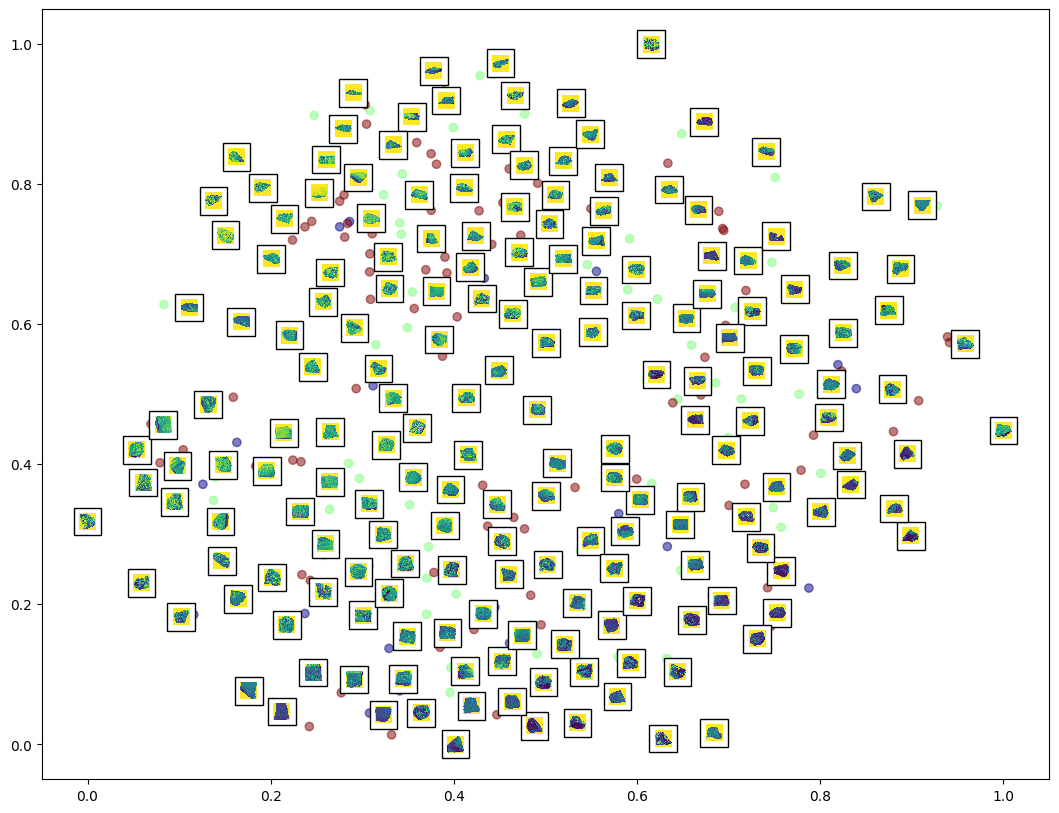

In [24]:
plot_rocks(X = tsne_reduced_2,images = img, y = category)

# LLE

In [25]:
lle_2 = LocallyLinearEmbedding(n_components=2, random_state=42)
%time lle_reduced_2 = lle_2.fit_transform(img_flat)

CPU times: user 16.1 s, sys: 230 ms, total: 16.3 s
Wall time: 17.2 s


In [26]:
lle_reduced_2.shape

(360, 2)

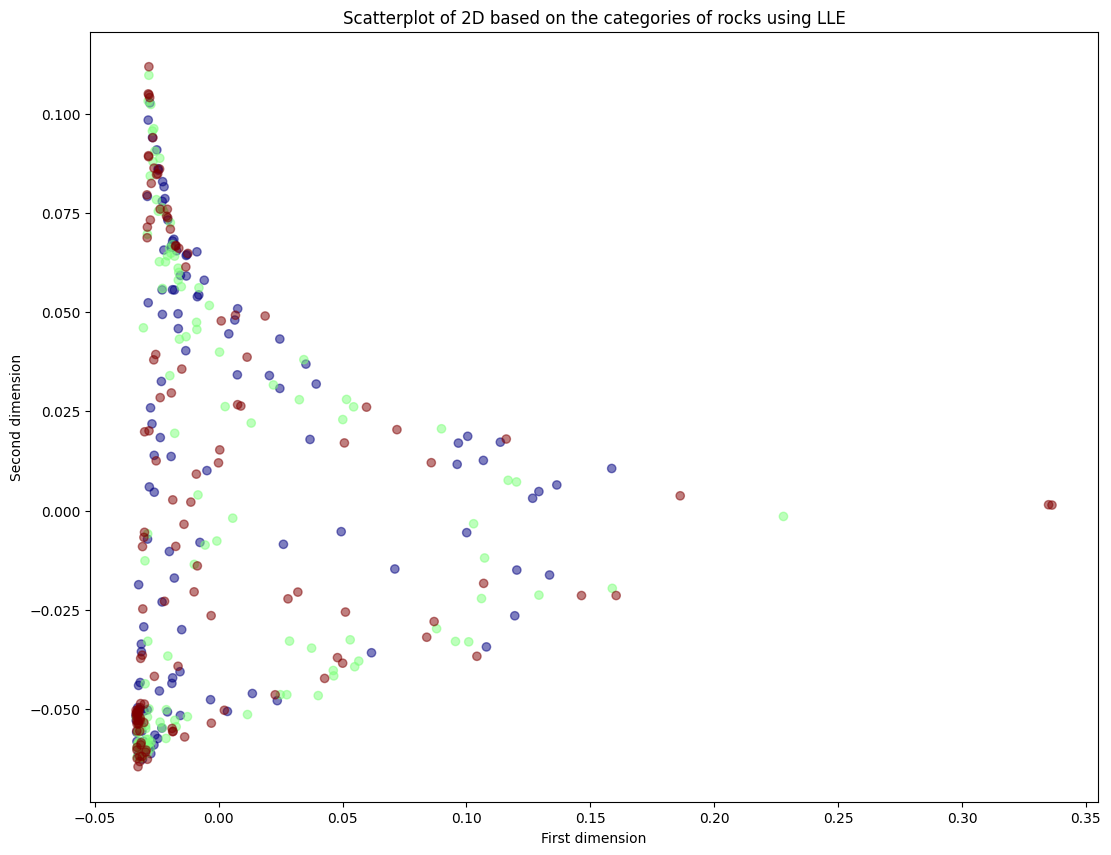

In [27]:
# Scatterplot of 2D based on the categories of rocks using LLE
plt.figure(figsize=(13, 10))
plt.scatter(lle_reduced_2[:, 0], lle_reduced_2[:, 1],
            c=category, cmap="jet", alpha=0.5)
plt.xlabel('First dimension')
plt.ylabel('Second dimension')
plt.title('Scatterplot of 2D based on the categories of rocks using LLE')
plt.show()

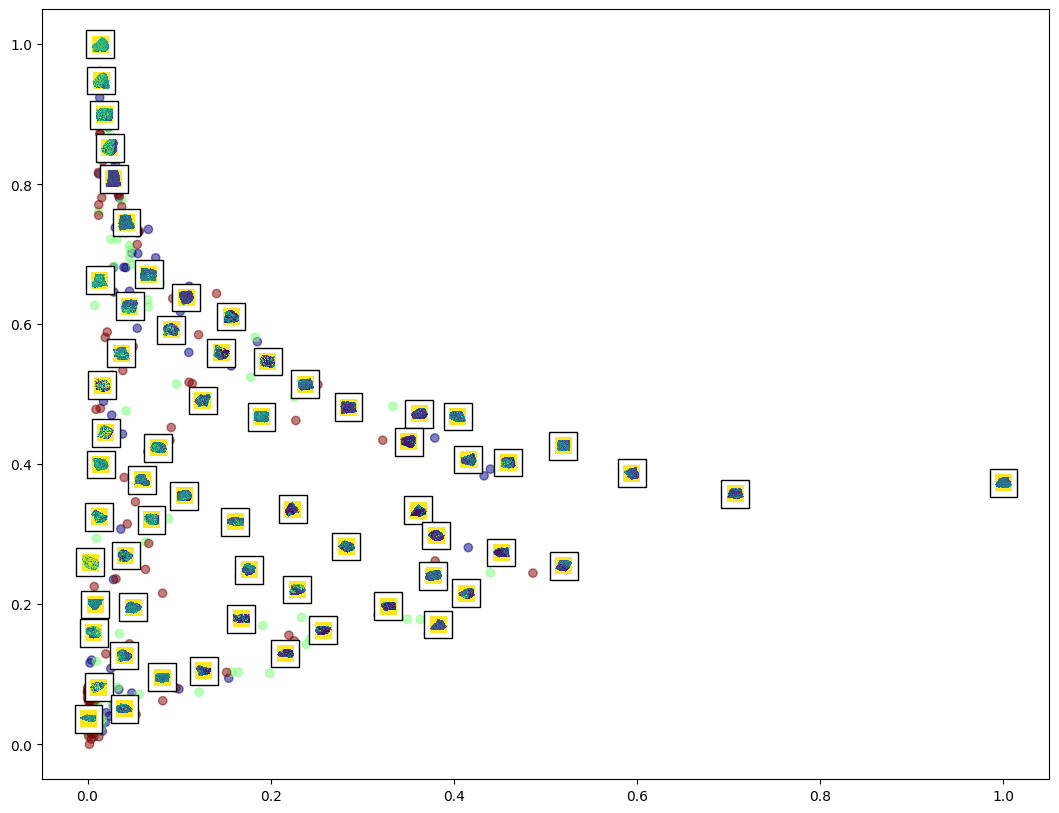

In [28]:
plot_rocks(X = lle_reduced_2,images = img, y = category)

# MDS

In [29]:
mds_2 = MDS(n_components=2, random_state=42)
%time mds_reduced_2 = mds_2.fit_transform(img_flat)

CPU times: user 8.13 s, sys: 3.28 s, total: 11.4 s
Wall time: 8.98 s


In [30]:
mds_reduced_2.shape

(360, 2)

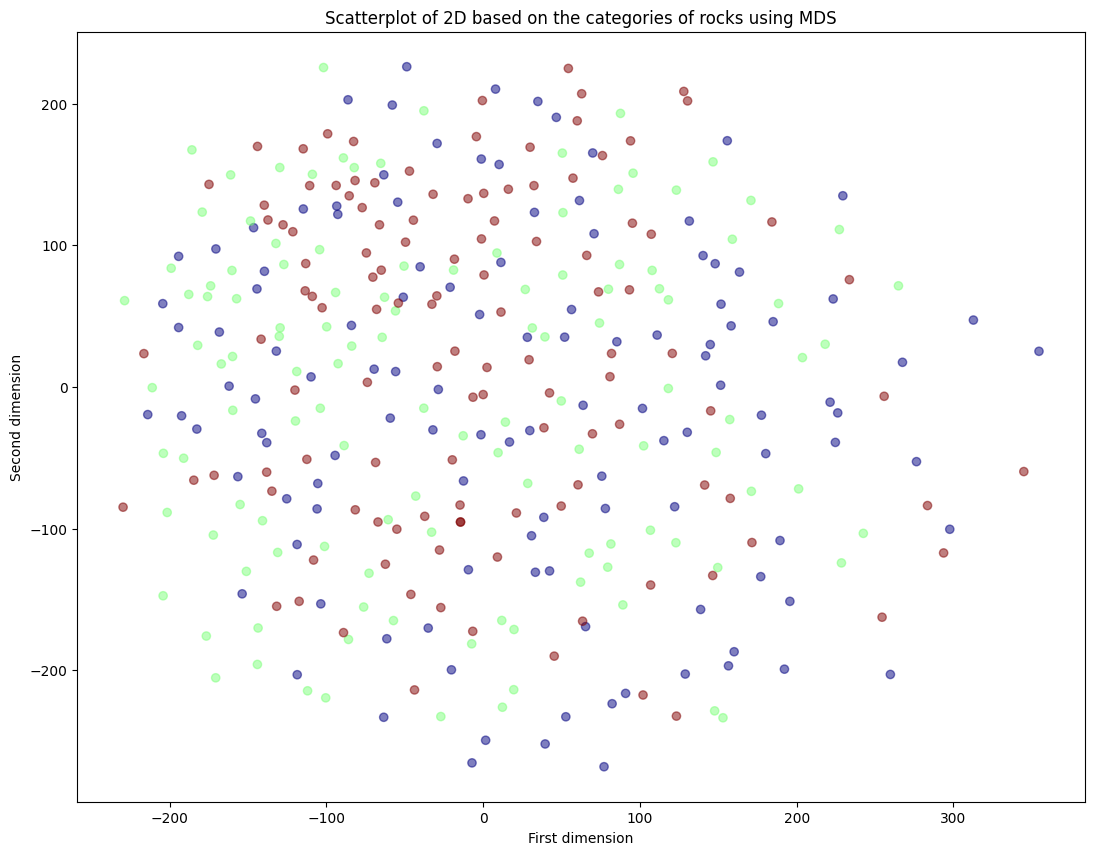

In [31]:
plt.figure(figsize=(13, 10))
plt.scatter(mds_reduced_2[:, 0], mds_reduced_2[:, 1],
            c=category, cmap="jet", alpha=0.5)
plt.xlabel('First dimension')
plt.ylabel('Second dimension')
plt.title('Scatterplot of 2D based on the categories of rocks using MDS')
plt.show()

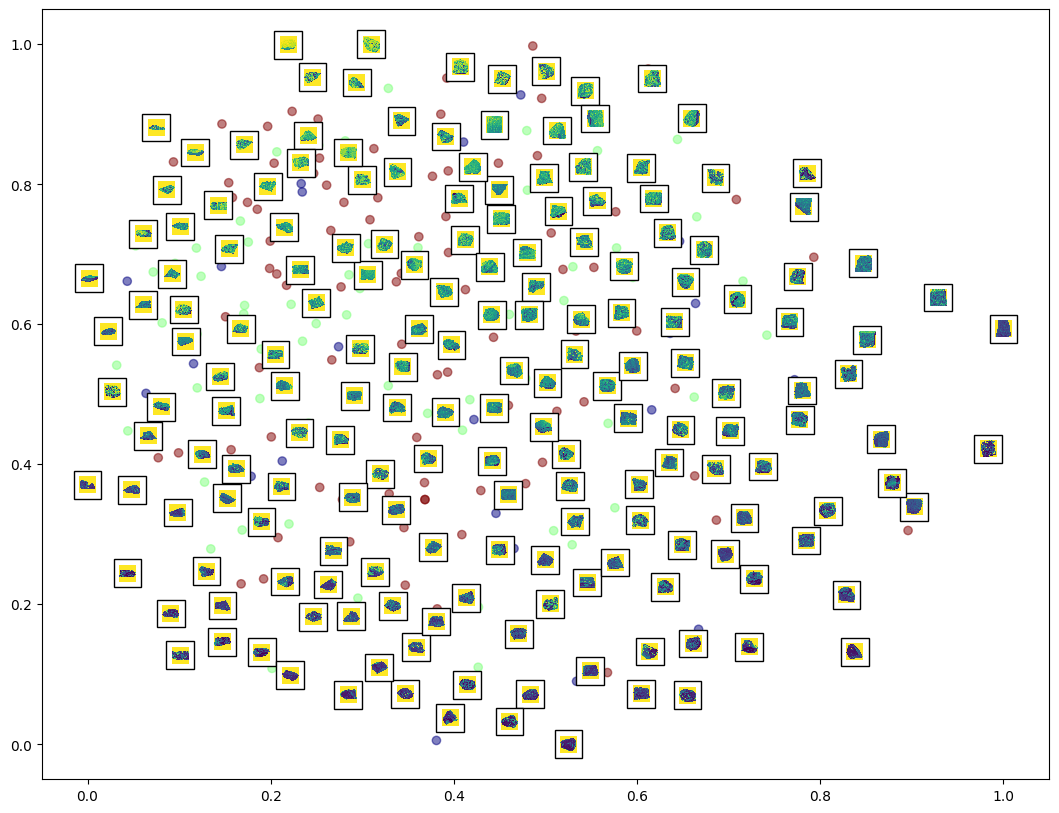

In [32]:
plot_rocks(X = mds_reduced_2,images = img, y = category)

# 3C: Solution

From the plots above, we can observe that PCA with only 2 components does not capture maximum variance of the data and hence the categories are not classified and we can see dispersion and the data points are cluttered. Since with 2D,PCA preserves almost 33.17 percent of the variance - if we  increase the number of dimensions, to increase the variance preserved with PCA, it can get extremely difficult to plot and interpret such data with higher dimensions.

t-SNE is better than PCA but does not represnt the classification of the data well.MDS, LLE also does not project the data well into 2D space. Even though in the plots with annotation box(images) we can observe a pattern of light and dark rocks which is again not clearly interpretable and cannot be classified together.

Hence None of the dimensionality reduction techniques can project the data points into lower dimensional space well and this is because of using only 2 componenets which almost captures and preserves less variance and cannot capture the complex structure of the underlying data. Other dimensionality reduction techniques and Deep learning might give better results in classifying the data points for this complex dataset.

# 4:

In [33]:
pca_8 = PCA(n_components=8, random_state=42)
%time pca_reduced_8 = pca_8.fit_transform(img_flat)

CPU times: user 29.1 s, sys: 4.45 s, total: 33.6 s
Wall time: 23 s


In [34]:
tsne_8 = TSNE(n_components=8, init="pca", learning_rate="auto", random_state=42, method="exact")
%time tsne_reduced_8 = tsne_8.fit_transform(img_flat)

CPU times: user 43.7 s, sys: 6.35 s, total: 50 s
Wall time: 34.3 s


In [35]:
lle_8 = LocallyLinearEmbedding(n_components=8, random_state=42)
%time lle_reduced_8 = lle_8.fit_transform(img_flat)

CPU times: user 15.1 s, sys: 218 ms, total: 15.3 s
Wall time: 12.6 s


In [36]:
mds_8 = MDS(n_components=8, random_state=42)
%time mds_reduced_8 = mds_8.fit_transform(img_flat)

CPU times: user 8.15 s, sys: 3.47 s, total: 11.6 s
Wall time: 8.47 s


In [37]:
matrix_with_human_data.shape

(360, 8)

The human data from mds_360.txt does not require scaling as it it scaled already.

In [38]:
# computing procustes of dim reductionality data and human data
mtx1, mtx_pca, disparity_pca = procrustes(matrix_with_human_data, pca_reduced_8)
mtx1, mtx_tsne, disparity_tsne = procrustes(matrix_with_human_data, tsne_reduced_8)
mtx1, mtx_lle, disparity_lle= procrustes(matrix_with_human_data, lle_reduced_8)
mtx1, mtx_mds, disparity_mds = procrustes(matrix_with_human_data, mds_reduced_8)

In [39]:
# disparity
print(f'Disparity for PCA {disparity_pca}')
print(f'Disparity for tsne {disparity_tsne}')
print(f'Disparity for lle {disparity_lle}')
print(f'Disparity for mds {disparity_mds}')

Disparity for PCA 0.8696671980403827
Disparity for tsne 0.9499141378958467
Disparity for lle 0.9270374245782964
Disparity for mds 0.887550807345169


The disparity score for PCA, t-SNE, LLE,MDS are:



1.  Disparity for PCA 0.8696671980403832
2. Disparity for tsne 0.949914137895847
3. Disparity for lle 0.9270794034073436
4. Disparity for mds 0.8875508073451701

The difference between the human data and the 2D PCA data is pretty low compared to other dimensionality reduction techniques. The disparity scores are generally very high for this data for the same reason stated above in Question 3C.


In [40]:
def compute_corr(mtx1, mtx2):
    correlations = []
    for i in range(mtx1.shape[1]):
        correlation, _ = pearsonr(mtx1[:, i], mtx2[:, i])
        correlations.append(correlation)
    return correlations

In [41]:
# computinf correlation between each dimensions of human data and dim-reduction techniques data
correlations_pca = compute_corr(mtx1, mtx_pca)
correlations_tsne = compute_corr(mtx1, mtx_tsne)
correlations_lle = compute_corr(mtx1, mtx_lle)
correlations_mds = compute_corr(mtx1, mtx_mds)

In [42]:
# displaying correlation results in a table
header = ["8 Features", "PCA", "t-SNE", "LLE", "MDS"]
table_data = []
for i in range(len(correlations_pca)):
    row = [f"Feature {i + 1}", correlations_pca[i], correlations_tsne[i], correlations_lle[i], correlations_mds[i]]
    table_data.append(row)

table = tabulate(table_data, headers=header, tablefmt="grid")
print("Pearson correlation between each dimensions of 4 dimension reduction techniques with human data")
print(table)

Pearson correlation between each dimensions of 4 dimension reduction techniques with human data
+--------------+-----------+----------+-----------+-----------+
| 8 Features   |       PCA |    t-SNE |       LLE |       MDS |
+==============+===========+==========+===========+===========+
| Feature 1    | 0.831021  | 0.439685 | 0.724376  | 0.830793  |
+--------------+-----------+----------+-----------+-----------+
| Feature 2    | 0.198367  | 0.156918 | 0.233238  | 0.212078  |
+--------------+-----------+----------+-----------+-----------+
| Feature 3    | 0.236229  | 0.118805 | 0.219728  | 0.240874  |
+--------------+-----------+----------+-----------+-----------+
| Feature 4    | 0.33828   | 0.231576 | 0.122451  | 0.298182  |
+--------------+-----------+----------+-----------+-----------+
| Feature 5    | 0.134877  | 0.181031 | 0.117525  | 0.171139  |
+--------------+-----------+----------+-----------+-----------+
| Feature 6    | 0.259304  | 0.266808 | 0.244717  | 0.253245  |
+-------

The disparity is pretty high for PCA ,LLE and MDS feature 1  when compared to other features.

# 5:

We use silhouette score to identify the optimal number of clusters in the data.

# 5A:

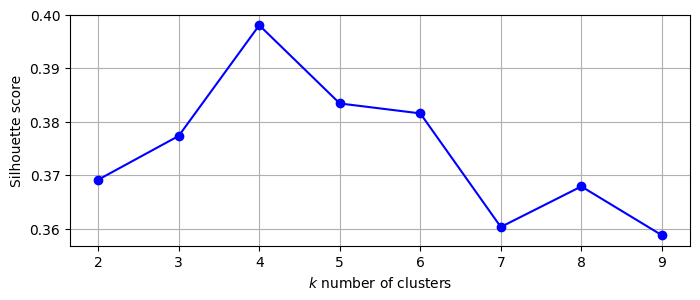

In [43]:
# silhouette scores plots to find optimal number of clusters k
kmeans = [KMeans(n_clusters=k, random_state=42).fit(pca_reduced_2)
                for k in range(1, 10)]
silhouette_scores = [silhouette_score(pca_reduced_2, model.labels_)
                     for model in kmeans[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$ number of clusters")
plt.ylabel("Silhouette score")
plt.grid()
plt.show()

Silhoutte score is highest for k= 4 number of clusters. Which means that silhouette coefficient is higher(0.4 almost) -  the instance is well inside its own cluster and far from other clusters. But it also underlines the fact that k= 5 is quite good as well with 0.385.

When we plot silhouette diagram we can observe every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This can be used to verify either k=4 or 5 is the optimal number of clusters

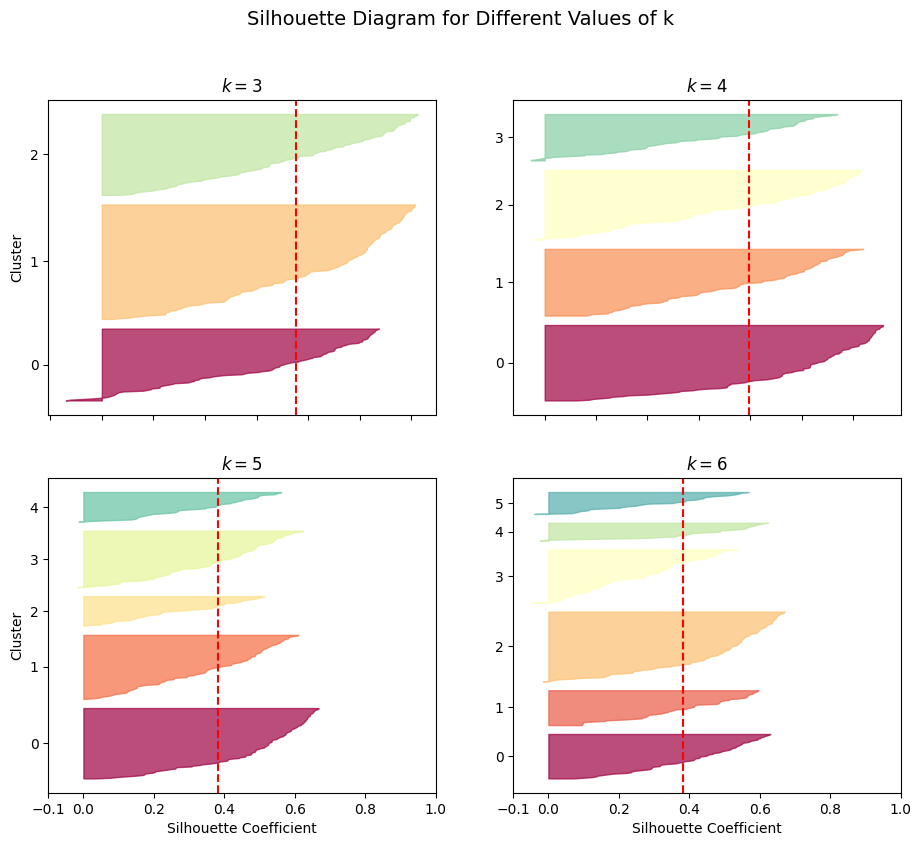

In [44]:
plt.figure(figsize=(11, 9))
plt.suptitle("Silhouette Diagram for Different Values of k", fontsize=14)

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans[k - 1].labels_
    silhouette_coefficients = silhouette_samples(pca_reduced_2, y_pred)

    padding = len(pca_reduced_2) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()

From the Silhoutte diagram we can observe that for k = 4, the clusters are equally spaced and have equal number of data points in each cluster when compared to k=5 which has one small cluster (2nd cluster). So we take k=4 as it has equal values of data points in each cluster and higher silhouette score

In [45]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(pca_reduced_2)

KMeans(n_clusters=4, random_state=42)

# 5B:

In [46]:
def plot_decision_boundaries(clusterer, X, category, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    colours = {0: 'red', 1: 'green', 2: 'blue'}
    category_labels = {0: 'I', 1: 'M', 2: 'S'}

    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')

    j=0
    for i in np.unique(category):
      plt.plot(X[np.array(category)==i,0], X[np.array(category)==i,1], 'k.', markersize=7,c=colours[j], label=category_labels[i])
      j+=1
    if show_centroids:
      plt.scatter(clusterer.cluster_centers_[:, 0], clusterer.cluster_centers_[:, 1],marker='o', s=35, linewidths=8, color='w', zorder=10, alpha=0.9)
      plt.scatter(clusterer.cluster_centers_[:, 0], clusterer.cluster_centers_[:, 1],marker='x', s=2, linewidths=12, color='k', zorder=11, alpha=1)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.legend()
    plt.show()

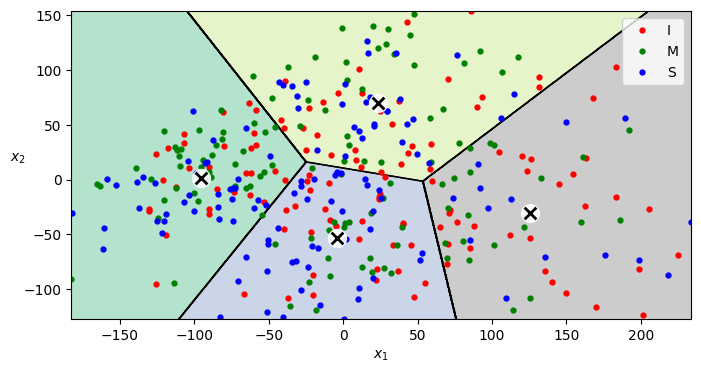

In [47]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, pca_reduced_2,category)
plt.show()

The clusters does not look good by using Kmeans because of the underlying complexity of the data which does not allow it to form compact clusters.

# 6:

# 6: A

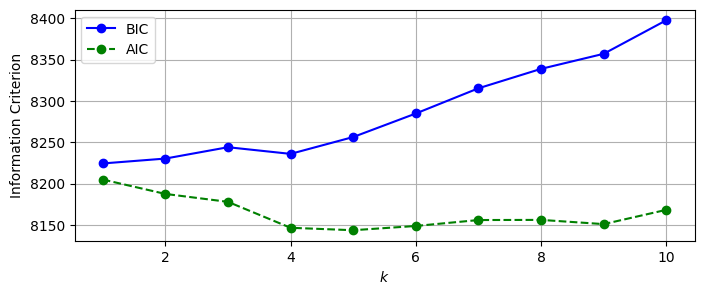

In [48]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(pca_reduced_2)
             for k in range(1, 11)]
bics = [model.bic(pca_reduced_2) for model in gms_per_k]
aics = [model.aic(pca_reduced_2) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$")
plt.ylabel("Information Criterion")
plt.legend()
plt.grid()
plt.show()

The AIC and BIC scores are closer when k= 3 and 4. We can also cluster based on using Bayesian Gaussian Mixture class which is capable of giving weights equal (or close) to zero to unnecessary clusters.By setting the number of components to higher values, say 10,  the algorithm will eliminate the unnecessary clusters automatically.

In [49]:
# used 10 componenets, but it automatically eliminates others and keeps 4
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(pca_reduced_2)
bgm.weights_.round(2)

array([0.29, 0.29, 0.24, 0.18, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

So in this case, we use 4 clusters for clustering with EM clustering on our dataset

# 6: B

In [50]:
gm = GaussianMixture(n_components=4, random_state=42,init_params ='k-means++' )
gm.fit(pca_reduced_2)

GaussianMixture(init_params='k-means++', n_components=4, random_state=42)

In [51]:
gm.weights_

array([0.36662136, 0.31725116, 0.19218056, 0.12394691])

In [52]:
gm.converged_

True

In [53]:
gm.n_iter_

21

In [54]:
def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):

    colours = {0: 'red', 1: 'yellow', 2: 'blue'}
    category_labels = {0: 'I', 1: 'M', 2: 'S'}

    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    j=0
    for i in np.unique(category):
      plt.plot(X[np.array(category)==i,0], X[np.array(category)==i,1], 'k.', markersize=7,c=colours[j], label=category_labels[i])
      j+=1

    if clusterer.weights_ is not None:
      clusterer.means_ = clusterer.means_[clusterer.weights_ > clusterer.weights_.max() / 10]
    plt.scatter(clusterer.means_[:, 0], clusterer.means_[:, 1],marker='o', s=35, linewidths=8,color='w', zorder=10, alpha=0.9)
    plt.scatter(clusterer.means_[:, 0], clusterer.means_[:, 1],marker='x', s=2, linewidths=12, color='k', zorder=11, alpha=1)

    plt.xlabel("$x_1$")
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

    plt.legend()
    plt.show()

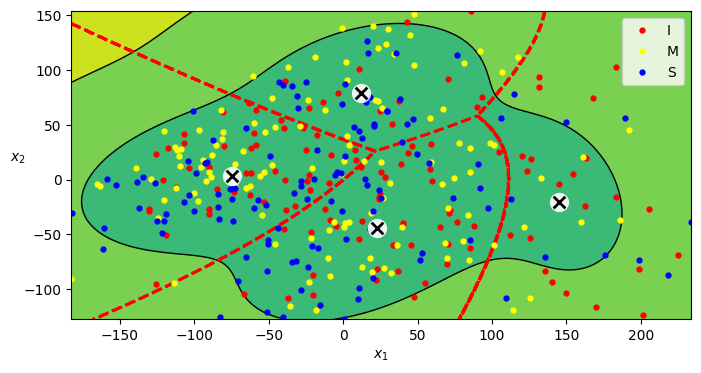

In [55]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, pca_reduced_2)
plt.show()

The resulting contour plot is similar to Kmeans, we see that EM is also not able to cluster the data properly due to the underlying complexity and dispersed data.

# 6:C

In [56]:
pca_2_new, y = gm.sample(20)
pca_2_new.shape

(20, 2)

In [57]:
pca_2_new_recovered = pca_2.inverse_transform(pca_2_new)

In [58]:
pca_2_new_recovered.shape

(20, 640000)

In [59]:
# reshaping to plot them
pca_2_new_recovered = pca_2_new_recovered.reshape(pca_2_new_recovered.shape[0], 800, 800)

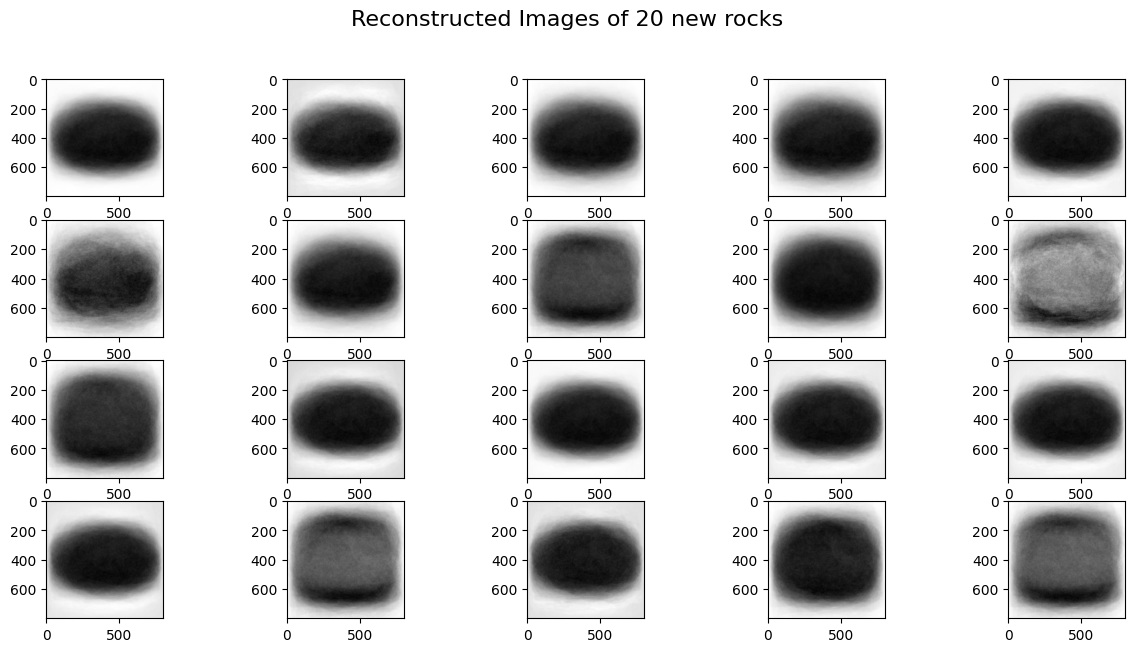

In [60]:
plt.figure(figsize=(15, 7))
plt.suptitle("Reconstructed Images of 20 new rocks", fontsize=16)
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(pca_2_new_recovered[i], cmap='gray')

The reconstructed images looks blurred as this is PCA reconstructed data and not the original dataset images and hence it is reconstructed using only 33 percent variance captured by the PCA - only 2 components.

# 7:

In [61]:
path= '/content/drive/MyDrive/AML/120 Rocks'
imgs_120 = sorted(os.listdir(path))
# load imgs_120 and grayscale
img_120=[]
for image in imgs_120:
  img_120.append(cv.imread(os.path.join(path, image), cv.IMREAD_GRAYSCALE))

img_120_resized = []
for res_img in img_120:
  img_120_resized.append(cv.resize(res_img, (256, 256)))

# flatten
img_120_flat = []
for i in range(len(img_120_resized)):
  img_120_flat.append(np.ravel(img_120_resized[i]))
img_120_flat = np.array(img_120_flat)

# scaling
img_120_flat = img_120_flat/255.0

In [62]:
img_360_resized =[]
for i in img_flat:
  img_360_resized.append(np.ravel(cv.resize(i.reshape(800,800),(256,256))))

In [63]:
img_360_resized[0].shape

(65536,)

In [64]:
category_120= []
for k in imgs_120:
  if k.startswith('I'):
    category_120.append(0)
  elif k.startswith('M'):
    category_120.append(1)
  else:
    category_120.append(2)

In [65]:
np.array(img_360_resized).shape

(360, 65536)

In [66]:
X_train = np.array(img_360_resized)
y_train= np.array(category)
X_val= img_120_flat
y_val= np.array(category_120)

In [67]:
# reshape training and val data(here test) for the model
X_train = np.reshape(X_train, (len(X_train),256,256,1))
X_val = np.reshape(X_val, (len(X_val),256,256,1))

# 7A:

In [74]:
# CNN

np.random.seed(42)
tf.random.set_seed(42)

start_time = time.time()
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val),shuffle=True, batch_size=32)
end_time = time.time()
training_time = end_time - start_time
print(f'Training time: {training_time}')

Epoch 1/100
12/12 [==============================] - 2s 77ms/step - loss: 1.1014 - accuracy: 0.2917 - val_loss: 1.0974 - val_accuracy: 0.3667
Epoch 2/100
12/12 [==============================] - 1s 53ms/step - loss: 1.0984 - accuracy: 0.3333 - val_loss: 1.0978 - val_accuracy: 0.3417
Epoch 3/100
12/12 [==============================] - 1s 53ms/step - loss: 1.0977 - accuracy: 0.3361 - val_loss: 1.0976 - val_accuracy: 0.3000
Epoch 4/100
12/12 [==============================] - 1s 54ms/step - loss: 1.0966 - accuracy: 0.3583 - val_loss: 1.0975 - val_accuracy: 0.3000
Epoch 5/100
12/12 [==============================] - 1s 54ms/step - loss: 1.0959 - accuracy: 0.3389 - val_loss: 1.0967 - val_accuracy: 0.3417
Epoch 6/100
12/12 [==============================] - 1s 54ms/step - loss: 1.0954 - accuracy: 0.3333 - val_loss: 1.0965 - val_accuracy: 0.3417
Epoch 7/100
12/12 [==============================] - 1s 54ms/step - loss: 1.0945 - accuracy: 0.3278 - val_loss: 1.0962 - val_accuracy: 0.3417
Epoch 

# 7A: Solution
The training time reported is 82.99798202514648 ms

# 7B:

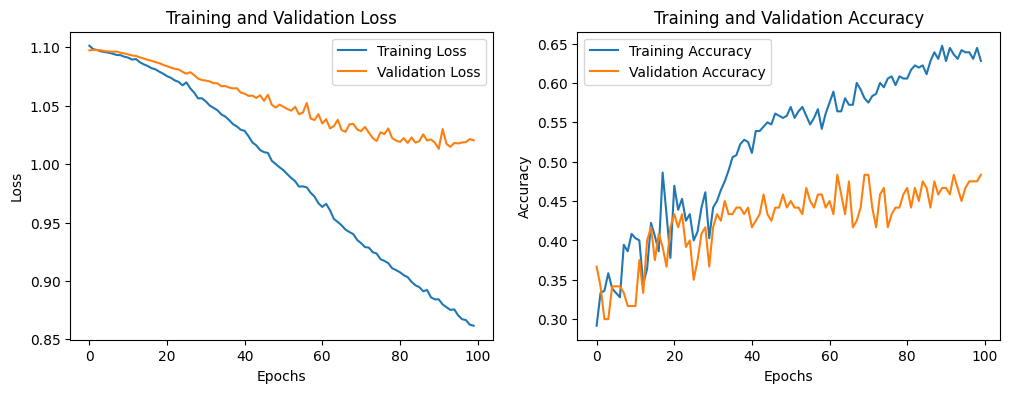

In [75]:
# training and validation loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

From the training and validation loss plot, we observe that the training loss keeps decreasing rapidly while the validation loss decreases slowly throughout 100 epochs. From the training and validation accuracy plot, we see that training and validation accuracy increases throughout the epochs and reaches around training accuracy of 62.78 percent and validation accuracy 48.33 percent which is pretty good for this dataset. Maybe if we increase the value of the training data by augmentatation, we can acheive higher accuracies and also introduce random new data samples into our original data.

# 7C:

In [76]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 64)      640       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 127, 127, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 8)       4616      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 62, 62, 8)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 30752)             0         
                                                                 
 dense_8 (Dense)             (None, 8)                

# 7C: Solution:

The total number of parameters of the network are 251307. Of those 83 parameters are bias parameters.


In [77]:
matrix_with_human_data_120 =np.loadtxt('/content/drive/MyDrive/AML/mds_120.txt')

In [78]:
matrix_with_human_data_120.shape

(120, 8)

The layer with 8 neurons in our case is dense_8

In [79]:
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('dense_8').output)

train_embeddings = intermediate_layer_model.predict(X_train)
validation_embeddings = intermediate_layer_model.predict(X_val)

4/4 [==============================] - 0s 12ms/step


In [80]:
train_embeddings.shape

(360, 8)

In [81]:
validation_embeddings.shape

(120, 8)

In [82]:
# procrustes analysis
human_data, train, disparity_train = procrustes(matrix_with_human_data, train_embeddings)
human_data_120, val, disparity_validation = procrustes(matrix_with_human_data_120, validation_embeddings)

In [83]:
print(f'Disparity for train data {disparity_train}')
print(f'Disparity for validation data {disparity_validation}')

Disparity for train data 0.8204792545448856
Disparity for validation data 0.8329261154006196


The procrustes analysis gives disparity of train data is lower than the validation data as expected, because our model is overfitting due to the complexity of dataset. So the difference between human data and train data is less compared to the validation data.

In [84]:
correlations_train = compute_corr(human_data, train)
correlations_val = compute_corr(human_data_120, val)

In [85]:
# correlation table
header = ["8 Features", "Training data", "Validation data"]
table_data = []
for i in range(len(correlations_train)):
    row = [f"Feature {i + 1}", correlations_train[i], correlations_val[i]]
    table_data.append(row)

table = tabulate(table_data, headers=header, tablefmt="grid")
print("Pearson correlation between each dimensions of training and validation data with the human data")
print(table)

Pearson correlation between each dimensions of training and validation data with the human data
+--------------+-----------------+-------------------+
| 8 Features   |   Training data |   Validation data |
+==============+=================+===================+
| Feature 1    |        0.637399 |          0.709931 |
+--------------+-----------------+-------------------+
| Feature 2    |        0.565515 |          0.508164 |
+--------------+-----------------+-------------------+
| Feature 3    |        0.399775 |          0.456126 |
+--------------+-----------------+-------------------+
| Feature 4    |        0.168041 |          0.190422 |
+--------------+-----------------+-------------------+
| Feature 5    |        0.239261 |          0.372109 |
+--------------+-----------------+-------------------+
| Feature 6    |        0.276925 |          0.267868 |
+--------------+-----------------+-------------------+
| Feature 7    |        0.441726 |          0.229847 |
+--------------+--------

The disparity is pretty high for Validation data feature 1  when compared to other features.

# References:

1. Dataset - https://osf.io/d6b9y/
2. Textbook- https://github.com/ageron/handson-ml3/tree/main
3. https://www.dataknowsall.com/imagepca.html#:~:text=PCA%20is%20nicely%20demonstrated%20when,array%20and%20see%20its%20shape.
